In [8]:
import pandas as pd
df=pd.read_csv(r"C:\Users\91735\Downloads\penguins_size.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


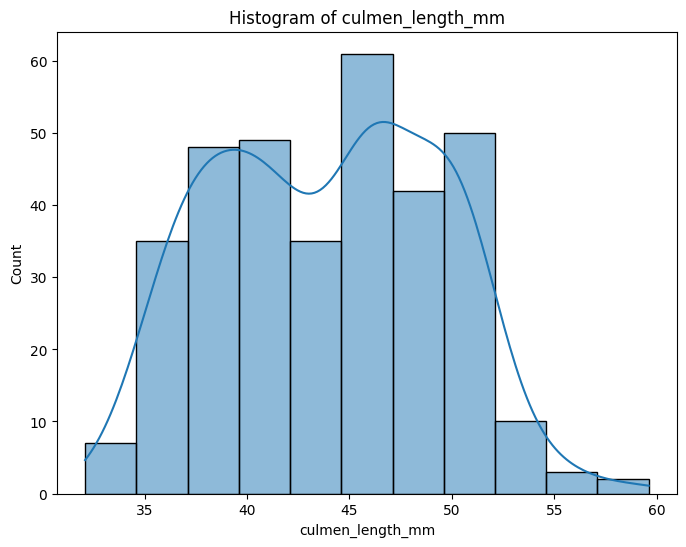

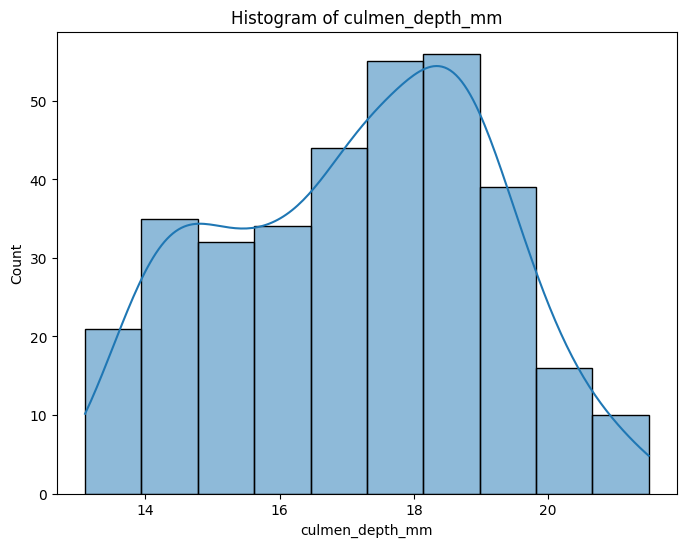

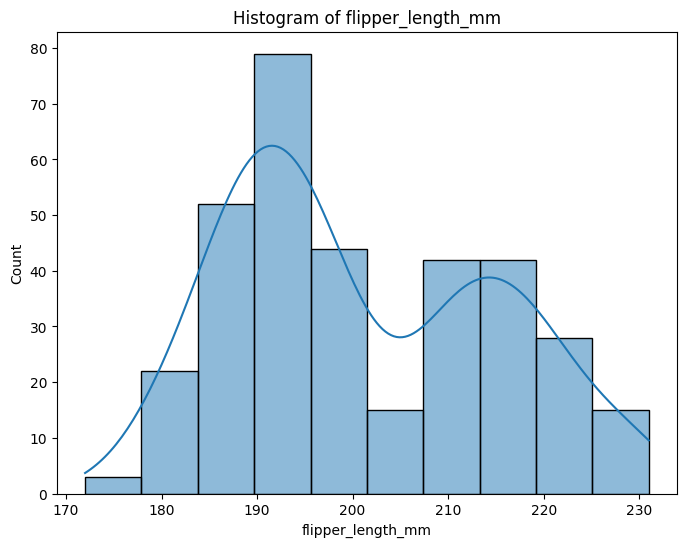

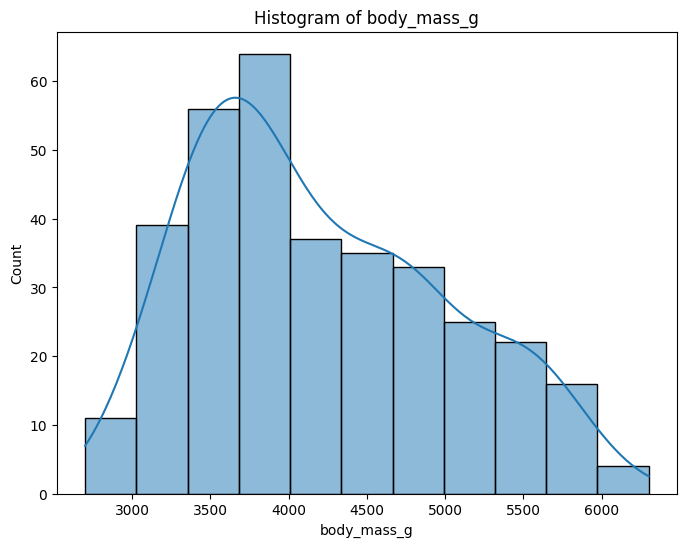

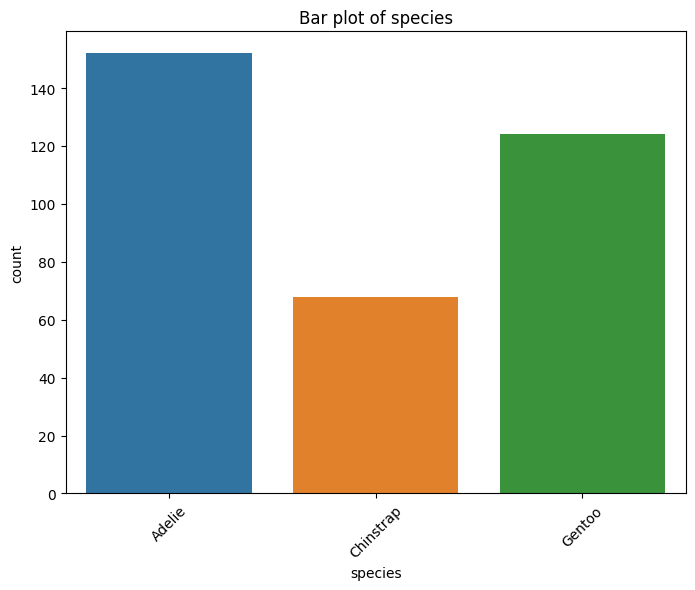

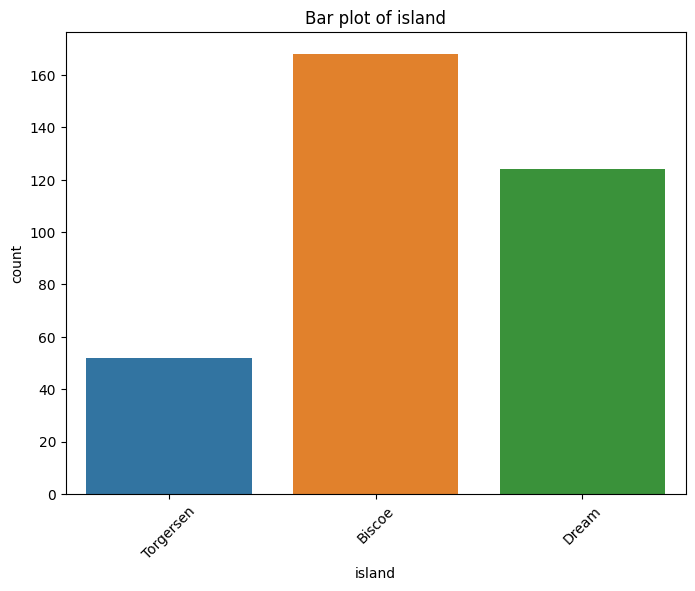

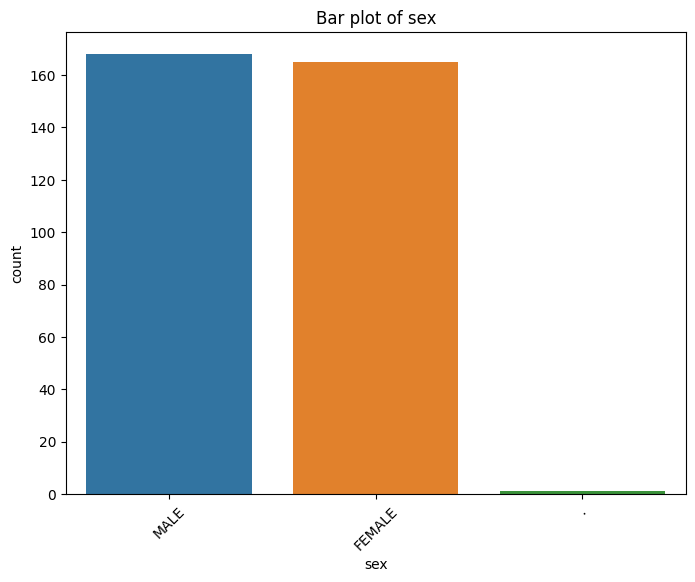

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()
categorical_features = ['species', 'island', 'sex']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Bar plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

c:\Users\91735\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


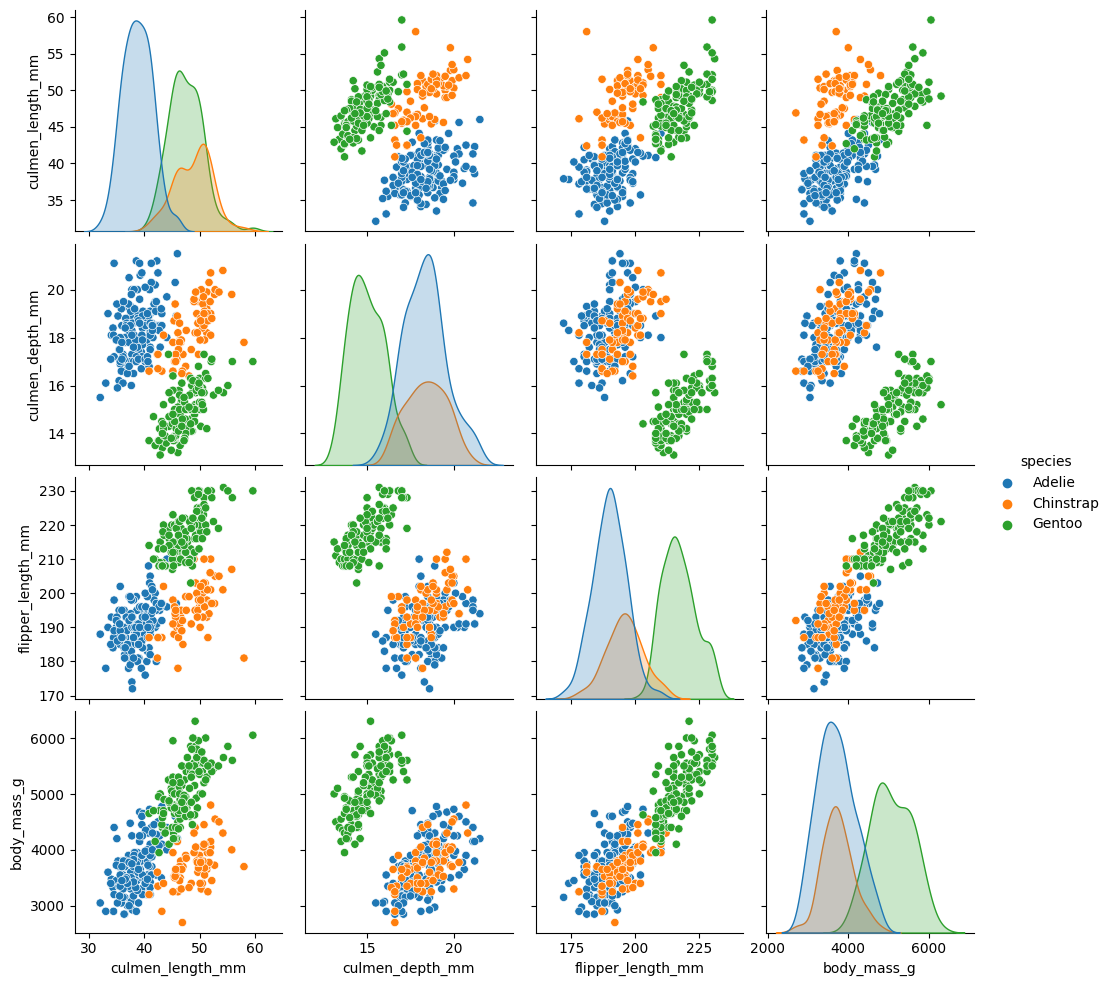

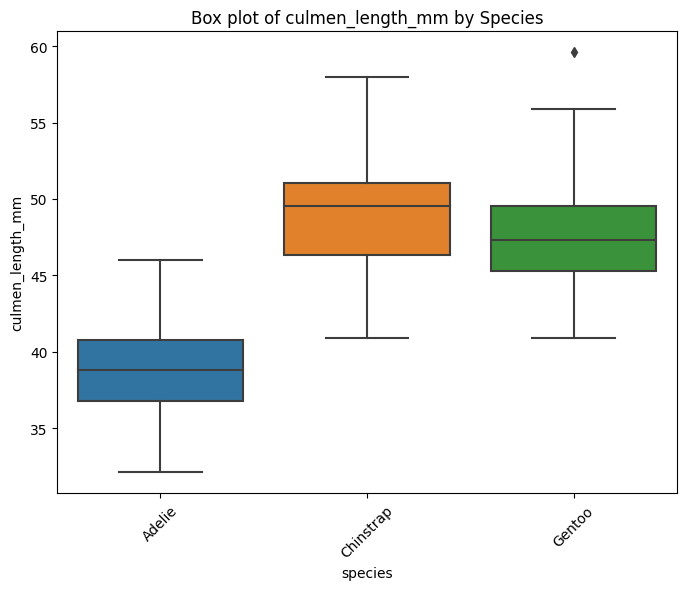

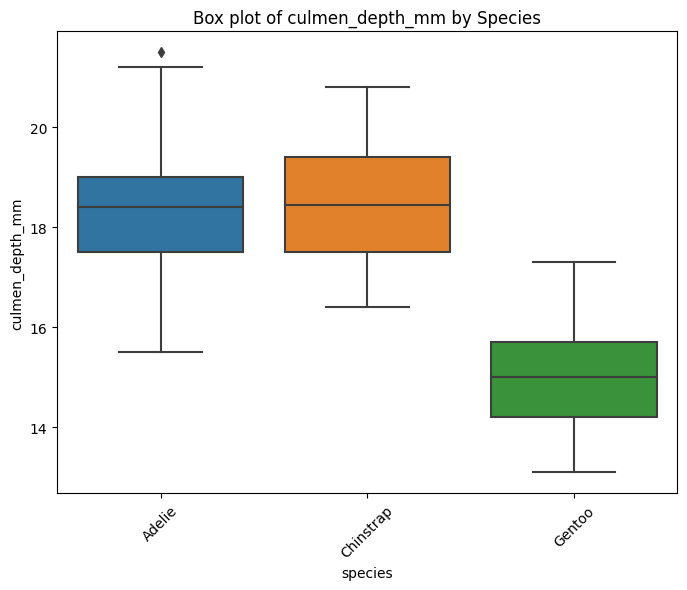

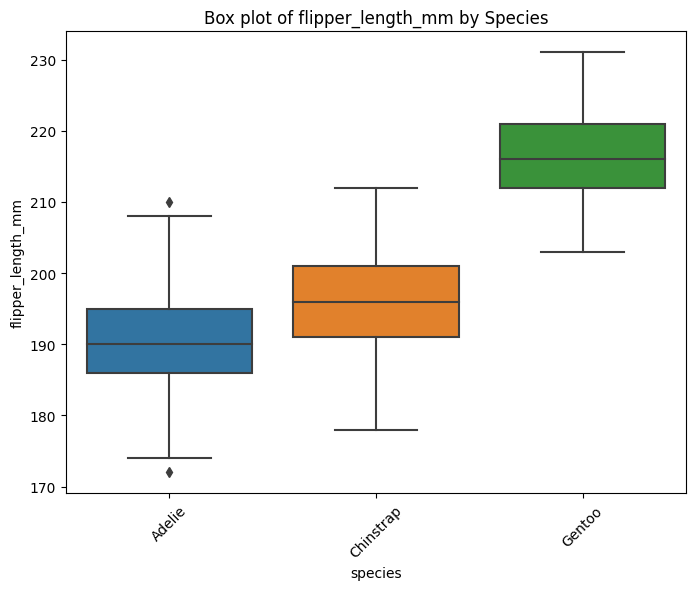

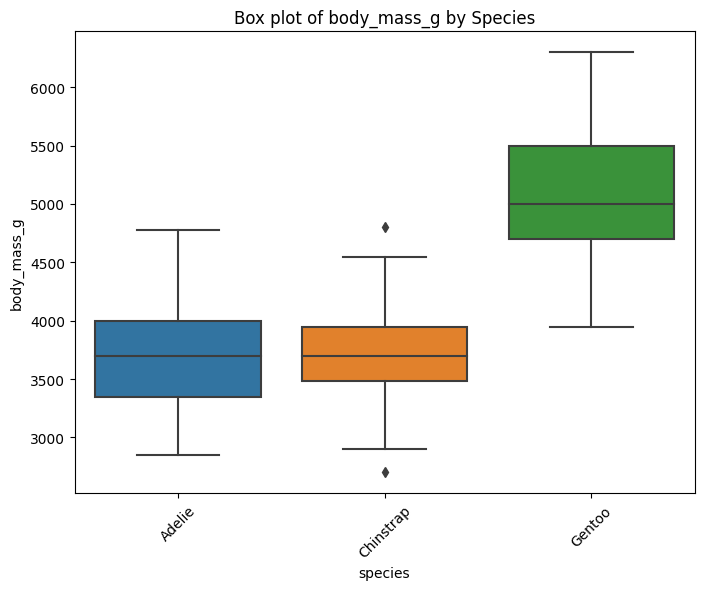

In [10]:
#Bivariate Analysis

sns.pairplot(df, hue='species')
plt.show()
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='species', y=feature)
    plt.title(f'Box plot of {feature} by Species')
    plt.xticks(rotation=45)
    plt.show()

c:\Users\91735\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


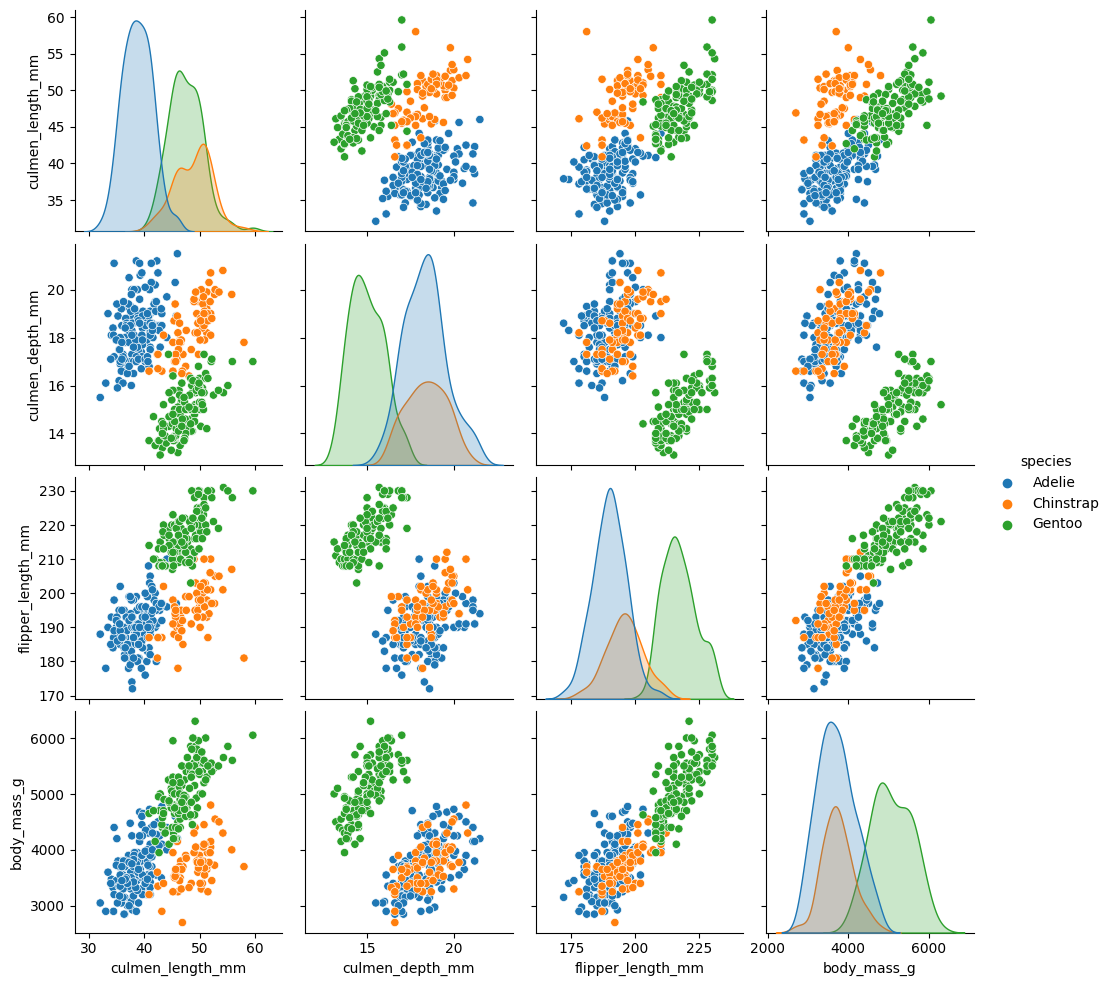

In [11]:
#Multivariate Analysis

sns.pairplot(df, hue='species')
plt.show()

In [12]:
#Desciptive statistics

full_stats = df.describe(include='all')

In [13]:
#Null values

missing_values = df.isnull().sum()
print(missing_values)
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numeric_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)
mode_value = df['sex'].mode().iloc[0]
df['sex'].fillna(mode_value, inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [14]:
#Check Correlation with the Target (Species)

correlation_matrix = df.corr()
target_correlation = correlation_matrix['species'].sort_values(ascending=False)
print(target_correlation)


ValueError: could not convert string to float: 'Adelie'

In [15]:
#one hot encoding

df_encoded = pd.get_dummies(df, columns=['species', 'island', 'sex'])
print(df_encoded.head())


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0             39.10             18.7              181.0       3750.0   
1             39.50             17.4              186.0       3800.0   
2             40.30             18.0              195.0       3250.0   
3             44.45             17.3              197.0       4050.0   
4             36.70             19.3              193.0       3450.0   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0            True              False           False          False   
1            True              False           False          False   
2            True              False           False          False   
3            True              False           False          False   
4            True              False           False          False   

   island_Dream  island_Torgersen  sex_.  sex_FEMALE  sex_MALE  
0         False              True  False       False      True  
1         

In [16]:
#splitting the data

X = df_encoded.drop(columns=['species_Chinstrap', 'species_Adélie', 'species_Gentoo'])
y = df_encoded[['species_Chinstrap', 'species_Adélie', 'species_Gentoo']]

KeyError: "['species_Adélie'] not found in axis"

In [17]:
# Scaling the data using StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: name 'X' is not defined

In [18]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

NameError: name 'X_scaled' is not defined